<a href="https://colab.research.google.com/github/Sruthikj/Pest-Prediction-System/blob/main/Pest_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ultralytics opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 17.5 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO

In [5]:
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model

In [7]:
data_path = '/content/data.yaml'
model.data = data_path

In [8]:
results = model.val()

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:01<00:00, 97.9MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:29<00:00, 4197.53file/s]

Dataset download success ✅ (694.5s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:20<00:00, 245.30it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [23:40<00:00,  4.54s/it]


                   all       5000      36335      0.634      0.475      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.648      0.514      0.562      0.365
            motorcycle        159        367      0.712       0.58      0.658      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.375      0.209
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydran

In [9]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fe96a0b4f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024


image 1/1 /content/Image_8_jpg.rf.c8af813b565e37012f319b135b45b392.jpg: 640x640 1 bird, 302.7ms
Speed: 4.8ms preprocess, 302.7ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)


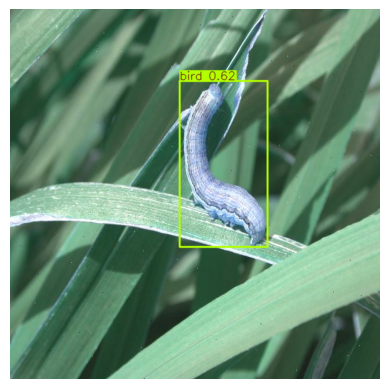

In [14]:
import matplotlib.pyplot as plt
import cv2

# Path to an image
image_path = '/content/Image_8_jpg.rf.c8af813b565e37012f319b135b45b392.jpg'

# Perform inference
results = model.predict(source=image_path)

# Access the annotated image from the results
annotated_image = results[0].plot()

# Convert and display the image using Matplotlib
plt.imshow(annotated_image)
plt.axis('off')
plt.show()

In [18]:
!unzip -q "/content/bounding box.v1i.yolov8.zip" -d "/content/dataset"

In [19]:
!ls /content/dataset

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [25]:
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')  # Use 'yolov8n.pt' for a lightweight model

In [30]:
model.train(
    data='/content/dataset/data.yaml',  # Path to your data.yaml
    epochs=1,                          # Number of training epochs
    imgsz=640,                          # Image size
    batch=16                            # Batch size
)

Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train93, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning /content/dataset/train/labels.cache... 801 images, 3 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/valid/labels.cache... 76 images, 0 backgrounds, 0 corrupt: 100%|██████████| 76/76 [00:00<?, ?it/s]

Plotting labels to runs/detect/train93/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train93
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G     0.9482      2.118      1.435          2        640: 100%|██████████| 51/51 [12:46<00:00, 15.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:26<00:00,  8.99s/it]


                   all         76        194      0.389      0.291      0.291      0.175

1 epochs completed in 0.224 hours.
Optimizer stripped from runs/detect/train93/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train93/weights/best.pt, 6.2MB

Validating runs/detect/train93/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.74s/it]


                   all         76        194      0.387      0.288      0.291      0.175
               alphids         36         65      0.198      0.169      0.154     0.0683
             armyworms         17         19      0.658      0.305      0.412        0.3
                  bugs         30         46      0.248      0.413      0.263      0.141
            honey-bees         42         64      0.445      0.266      0.335      0.191
Speed: 3.5ms preprocess, 281.6ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train93


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fe2f8bada0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [32]:
results = model.predict(source='/content/dataset/test/images', save=True)


image 1/38 /content/dataset/test/images/Image_102_jpg.rf.218df7833c3bc3a3aad67e707e1bfbc2.jpg: 640x640 3 bugss, 288.3ms
image 2/38 /content/dataset/test/images/Image_105_jpg.rf.e4799f9b11b046bf12b398cdcea89d8d.jpg: 640x640 (no detections), 259.5ms
image 3/38 /content/dataset/test/images/Image_10_jpg.rf.1f8480dc6e9b25a0a0c6d6cdf46570d0.jpg: 640x640 2 alphidss, 1 bugs, 252.4ms
image 4/38 /content/dataset/test/images/Image_115_jpg.rf.d565cc3b73212cac350cfae8f4206755.jpg: 640x640 1 alphids, 256.9ms
image 5/38 /content/dataset/test/images/Image_116_jpg.rf.0554e57164ff6b4b5703e697045c304c.jpg: 640x640 1 armyworms, 267.6ms
image 6/38 /content/dataset/test/images/Image_119_jpg.rf.08803b701ad1562aa92238ca8837f01b.jpg: 640x640 4 bugss, 252.9ms
image 7/38 /content/dataset/test/images/Image_21_jpg.rf.29471d0f2112c235887a68e6cf0d2240.jpg: 640x640 1 alphids, 2 bugss, 276.1ms
image 8/38 /content/dataset/test/images/Image_21_jpg.rf.71066f81f9e223a8b7f4034a26f80e4a.jpg: 640x640 2 bugss, 389.6ms
image 

In [58]:
from IPython.display import Image

In [40]:
pest_recommendations = {
    'aphid': 'Neem oil spray',
    'armyworms': 'Sulfur-based spray',
    'bugs': 'Pyrethrin-based insecticide',
    'honey-bees': 'Bacillus thuringiensis (Bt)'
}

In [55]:
def detect_and_recommend(image_path):
    # Perform detection
    results = model.predict(source=image_path)

    # Extract detected classes
    detected_classes = [model.names[int(box.cls)] for box in results[0].boxes]

    # Provide recommendations
    for pest in detected_classes:
        recommendation = pest_recommendations.get(pest, "No recommendation available")
        print(f"Pest: {pest} -> Recommendation: {recommendation}")

    # Display the input image
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


image 1/1 /content/Image_2_jpg.rf.3f356d968a5e5f967112a2de4b989d1b.jpg: 640x640 1 bugs, 260.1ms
Speed: 9.0ms preprocess, 260.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Pest: bugs -> Recommendation: Pyrethrin-based insecticide


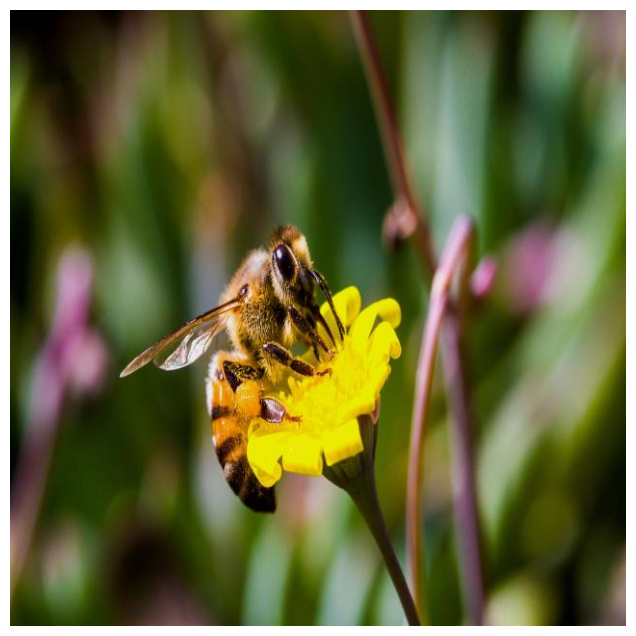

In [56]:
detect_and_recommend('/content/Image_2_jpg.rf.3f356d968a5e5f967112a2de4b989d1b.jpg')


image 1/1 /content/Image_116_jpg.rf.0554e57164ff6b4b5703e697045c304c.jpg: 640x640 1 armyworms, 456.4ms
Speed: 7.2ms preprocess, 456.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Pest: armyworms -> Recommendation: Sulfur-based spray


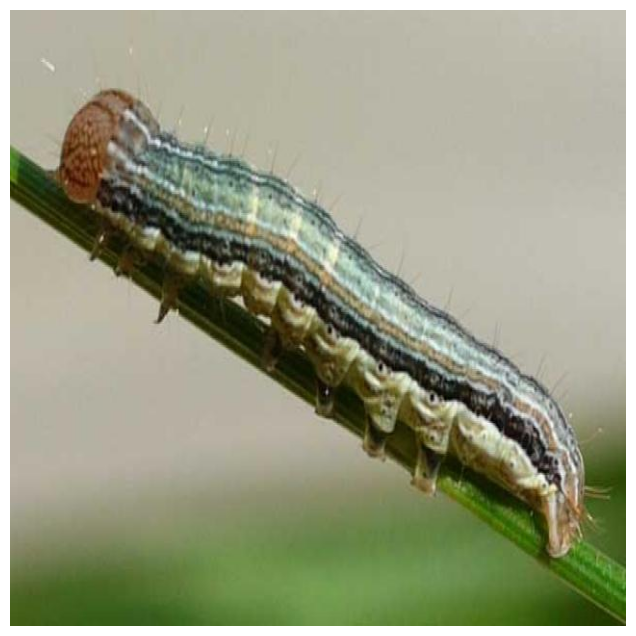

In [57]:
detect_and_recommend('/content/Image_116_jpg.rf.0554e57164ff6b4b5703e697045c304c.jpg')